# 토큰화

## 영어

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 단어

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')
text = "Age is no guarantee of maturity."
doc = nlp(text)

spacy_tokenized_nltk = [token.text for token in doc]
spacy_tokenized_nltk

['Age', 'is', 'no', 'guarantee', 'of', 'maturity', '.']

### 문장

In [3]:
text = "Life is from the inside out. When you shift on the inside, life shifts on the outside."
doc = nlp(text)
sent_tokenized_spacy = [sent.text for sent in doc.sents]
sent_tokenized_spacy

['Life is from the inside out.',
 'When you shift on the inside, life shifts on the outside.']

## 한글


In [5]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 34.6 MB/s eta 0:00:00


In [7]:
from konlpy.tag import Kkma
kkma = Kkma()
text = '나는 용산에서 수업을 하고 있습니다.'
print(kkma.morphs(text)) # 형태소로 나눈다(토크나이징)
print(kkma.nouns(text)) # 명사 추출
print(kkma.pos(text)) # 품사 태깅
print(kkma.pos(text, join = True)) # 품사 태깅

['나', '는', '용', '산', '에서', '수업', '을', '하', '고', '있', '습니다', '.']
['나', '용', '수업']
[('나', 'NP'), ('는', 'JX'), ('용', 'NNG'), ('산', 'XSN'), ('에서', 'JKM'), ('수업', 'NNG'), ('을', 'JKO'), ('하', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('습니다', 'EFN'), ('.', 'SF')]
['나/NP', '는/JX', '용/NNG', '산/XSN', '에서/JKM', '수업/NNG', '을/JKO', '하/VV', '고/ECE', '있/VXV', '습니다/EFN', './SF']


In [8]:
from konlpy.tag import Okt
text = '사람은 비슷한 일을 겪고도 똑같은 일을 반복한다. 사람은 쉽게 변하지 않는다'
okt = Okt()
print(okt.morphs(text)) # 형태소로 나눈다.

print(okt.morphs(text, stem = True)) # 형태소로 나눈 뒤 어간 추출

print(okt.nouns(text)) # 명사 추출
print(okt.phrases(text)) # 어절 단위로 추출

print(okt.pos(text)) # 품사 태깅
print(okt.pos(text, join = True)) # 품사 태깅 2


['사람', '은', '비슷한', '일', '을', '겪고도', '똑같은', '일', '을', '반복', '한다', '.', '사람', '은', '쉽게', '변하지', '않는다']
['사람', '은', '비슷하다', '일', '을', '겪다', '똑같다', '일', '을', '반복', '하다', '.', '사람', '은', '쉬다', '변하다', '않다']
['사람', '일', '일', '반복', '사람']
['사람', '비슷한 일', '똑같은 일', '반복']
[('사람', 'Noun'), ('은', 'Josa'), ('비슷한', 'Adjective'), ('일', 'Noun'), ('을', 'Josa'), ('겪고도', 'Verb'), ('똑같은', 'Adjective'), ('일', 'Noun'), ('을', 'Josa'), ('반복', 'Noun'), ('한다', 'Verb'), ('.', 'Punctuation'), ('사람', 'Noun'), ('은', 'Josa'), ('쉽게', 'Verb'), ('변하지', 'Adjective'), ('않는다', 'Verb')]
['사람/Noun', '은/Josa', '비슷한/Adjective', '일/Noun', '을/Josa', '겪고도/Verb', '똑같은/Adjective', '일/Noun', '을/Josa', '반복/Noun', '한다/Verb', './Punctuation', '사람/Noun', '은/Josa', '쉽게/Verb', '변하지/Adjective', '않는다/Verb']


# Normalization

## 특수문자 제거

In [9]:
import spacy

# spacy 모델 로드
nlp = spacy.load("en_core_web_sm")

text = "Natural language processing, or NLP, is fun! Isn't it?"

# 텍스트를 spacy Doc 객체로 변환
doc = nlp(text)

# 토큰화된 결과를 리스트로 변환
original_tokens = [token.text for token in doc]

print(original_tokens)
print(f'특수 문자 제거 전 토큰 개수 : {len(original_tokens)}개')

['Natural', 'language', 'processing', ',', 'or', 'NLP', ',', 'is', 'fun', '!', 'Is', "n't", 'it', '?']
특수 문자 제거 전 토큰 개수 : 14개


In [10]:
import re
text_cleaned = re.sub('[^\w\s]', '', text)
doc = nlp(text_cleaned)
tokens = [token.text for token in doc]
print(tokens)
print(f'특수 문자 제거 후 토큰 개수 : {len(tokens)}개')

['Natural', 'language', 'processing', 'or', 'NLP', 'is', 'fun', 'Is', 'nt', 'it']
특수 문자 제거 후 토큰 개수 : 10개


In [13]:
import pandas as pd
IMDB = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/NLP/ENG/IMDB_Top10000.csv', index_col = 0)
IMDB = IMDB.loc[:100,:]

In [14]:
def preprocess_text(text):
    text = text.lower() # 소문자로
    text_cleaned = re.sub('[^\w\s]', '', text)
    doc = nlp(text_cleaned)
    tokens = [token.text for token in doc]
    return tokens
IMDB['tokenized'] = IMDB['review'].apply(preprocess_text)

In [16]:
from collections import Counter

tokenized_word_counts = Counter()

# 토큰화 된 각 리뷰 리스트를 카운터 객체에 업데이트
IMDB['tokenized'].apply(lambda x : tokenized_word_counts.update(x))
tokenized_word_counts.most_common(10)

[('the', 1385),
 ('a', 719),
 ('and', 645),
 ('of', 621),
 ('to', 610),
 ('is', 439),
 ('in', 428),
 ('i', 387),
 ('it', 331),
 ('this', 324)]

<Axes: >

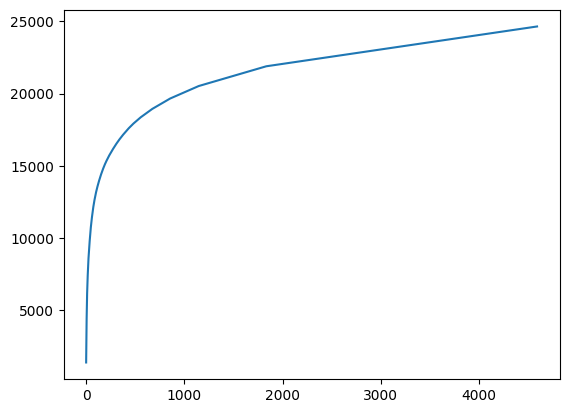

In [17]:
most_common_tokens = tokenized_word_counts.most_common()
df_most_common = pd.DataFrame(most_common_tokens, columns = ['Token', 'Count'])
df_most_common['rank'] = df_most_common['Count'].rank(ascending=False) # 순위
df_most_common['cumSumCount'] = df_most_common['Count'].cumsum() # 누적합
df_most_common['cumSumCount'].plot()

In [18]:
import plotly.express as px
df_top100 = df_most_common.head(100)
fig = px.treemap(df_top100, path=['Token'], values='Count')
fig.show()

## 불용어 제거

### 한글

In [19]:
from konlpy.tag import Okt
okt = Okt()
text = '사람은 비슷한 일을 겪고도 똑같은 일을 반복한다. 사람은 쉽게 변하지 않는다'
stopword = set('은 을 한다 쉽게'.split(' '))

tokens = okt.morphs(text)
result = [token for token in tokens if not token in stopword]

print(f'불용어 제거 전 토큰 수 : {len(tokens)}')
print(f'불용어 제거 후 토큰 수 : {len(result)}')

불용어 제거 전 토큰 수 : 17
불용어 제거 후 토큰 수 : 11


### 영어

In [20]:
import spacy

# spacy 모델 로드
nlp = spacy.load("en_core_web_sm")

text = "Natural language processing, or NLP, is fun! Isn't it?"

# 텍스트를 spacy Doc 객체로 변환
doc = nlp(text)

# 토큰화된 결과를 리스트로 변환
original_tokens = [token.text for token in doc]
print(f'불용어 제거 전 토큰 개수 : {len(original_tokens)}개')

불용어 제거 전 토큰 개수 : 14개


In [21]:
import spacy

# SpaCy 모델 로드
nlp = spacy.load("en_core_web_sm")

# 텍스트 처리
text = "Natural language processing, or NLP, is fun! Isn't it?"
doc = nlp(text.lower())  # 소문자로 변환 후 분석

# 불용어 제거
result = [token.text for token in doc if not token.is_stop and token.is_alpha]  # 불용어 제거 및 알파벳 토큰 필터링
print(f'불용어 제거 후 토큰 수 : {len(result)}')
print(f'토큰 리스트 : {result}')

불용어 제거 후 토큰 수 : 5
토큰 리스트 : ['natural', 'language', 'processing', 'nlp', 'fun']


### 데이터 프레임

In [22]:
import pandas as pd
IMDB = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/NLP/ENG/IMDB_Top10000.csv', index_col = 0)
IMDB = IMDB.loc[:100,:]

In [23]:
def preprocess_text(text):
    text = text.lower() # 소문자로
    text_cleaned = re.sub('[^\w\s]', '', text) # 특수문자 제거
    doc = nlp(text_cleaned)
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha] # 불용어 제거 및 토큰화
    return tokens
IMDB['tokenized'] = IMDB['review'].apply(preprocess_text)

In [24]:
from collections import Counter

tokenized_word_counts = Counter()

# 토큰화 된 각 리뷰 리스트를 카운터 객체에 업데이트
IMDB['tokenized'].apply(lambda x : tokenized_word_counts.update(x))
tokenized_word_counts.most_common(10)

[('br', 248),
 ('film', 179),
 ('movie', 169),
 ('nt', 149),
 ('like', 89),
 ('story', 58),
 ('good', 55),
 ('films', 52),
 ('s', 50),
 ('bad', 47)]

<Axes: >

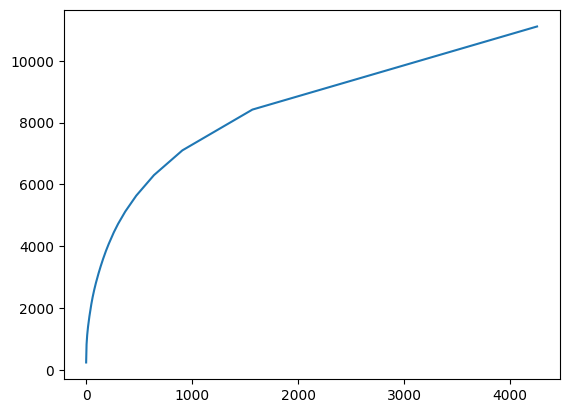

In [25]:
most_common_tokens = tokenized_word_counts.most_common()
df_most_common = pd.DataFrame(most_common_tokens, columns = ['Token', 'Count'])
df_most_common['rank'] = df_most_common['Count'].rank(ascending=False) # 순위
df_most_common['cumSumCount'] = df_most_common['Count'].cumsum() # 누적합
df_most_common['cumSumCount'].plot()

In [26]:
import plotly.express as px
df_top100 = df_most_common.head(100)
fig = px.treemap(df_top100, path=['Token'], values='Count')
fig.show()

## 어간추출

In [27]:
import spacy

# SpaCy 모델 로드
nlp = spacy.load("en_core_web_sm")

# 텍스트 처리
words = "jumping"  # 입력 단어
doc = nlp(words)

# Lemmatization (어근 추출)
result = [token.lemma_ for token in doc][0]  # 첫 번째 토큰의 어근 추출
print(result)

jump


# 실습
(1) 아래의 데이터셋을 데이터 전처리 & 토크나이징 해보세요!
  - 문자를 소문자로 통일
  - 정규표현식을 사용하여 특수문자 제거
  - 불용어 제거
  - 토큰화


  

In [28]:
import pandas as pd
email = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/NLP/ENG/SPAM%20text%20message%2020170820%20-%20Data.csv')
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
def preprocess_text(text):
  text = text.lower() # 소문자로
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # 특수문자 제거
  doc = nlp(cleaned_text)
  tokens = [token.text for token in doc if not token.is_stop and token.is_alpha] # 불용어 제거 및 토큰화
  return tokens
email['Message'] = email['Message'].apply(lambda text : preprocess_text(text))

(2) 시각화
- cumsum함수를 활용하여 누적 분포 그래프를 라인차트로 시각화
- 가장 많이 생성 된 Top100 토큰을 트리맵으로 시각화

ps. 전처리 전후를 비교해보셔도 좋아요!

In [39]:
from collections import Counter

tokenized_word_counts = Counter()

# 토큰화 된 각 리뷰 리스트를 카운터 객체에 업데이트
email['Message'].apply(lambda x : tokenized_word_counts.update(x))
tokenized_word_counts.most_common(10)

[('u', 1130),
 ('nt', 730),
 ('m', 497),
 ('ur', 390),
 ('s', 326),
 ('ok', 278),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257),
 ('got', 251)]

<Axes: >

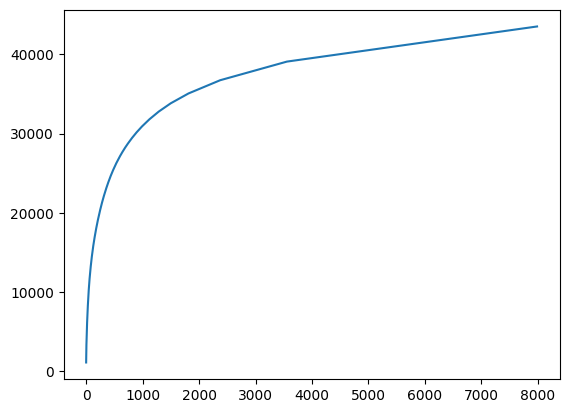

In [40]:
most_common_tokens = tokenized_word_counts.most_common()
df_most_common = pd.DataFrame(most_common_tokens, columns = ['Token', 'Count'])
df_most_common['rank'] = df_most_common['Count'].rank(ascending=False) # 순위
df_most_common['cumSumCount'] = df_most_common['Count'].cumsum() # 누적합
df_most_common['cumSumCount'].plot()

In [41]:
import plotly.express as px
df_top100 = df_most_common.head(100)
fig = px.treemap(df_top100, path=['Token'], values='Count')
fig.show()

# 정규표현식

## 1) regex(.)
.은 한개의 임의의 문자를 나타냅니다.

In [42]:
import re
r = re.compile("a.c") # 정규표현식
r.search('kkk') # X
r.search('abc') # O

<re.Match object; span=(0, 3), match='abc'>

## 2) regex(?)
?앞의 문자가 존재할수도 있고 존재하지 않을수도 있다.

In [46]:
r = re.compile('ab?c')
r.search('abc') # O
r.search('ac') # O
r.search('abbc') # X

## 3) regex(*)
*앞의 문자가 0개 이상일 경우

In [47]:
r = re.compile('ab*c')
r.search('abc') # O
r.search('ac') # O
r.search('abbc') # O

<re.Match object; span=(0, 4), match='abbc'>

## 4) regex(+)
*랑 매우 유사합니다. 최소 1개 이상인 경우만 매치

In [51]:
r = re.compile('ab+c')
r.search('abc') # O
r.search('ac') # x
r.search('abbc') # O
r.search('abbbbbbbbbbbbbbbbbbbbbbbbbbbc') # O

<re.Match object; span=(0, 29), match='abbbbbbbbbbbbbbbbbbbbbbbbbbbc'>

## 5) regex(^)
^는 ^뒤에 있는 문자열로 시작되는 경우에 매치

In [55]:
r = re.compile('^ab')
r.search('abc') # O
r.search('ac') # X
r.search('abbc') # O
r.search('cab') # X

## 6) regex({숫자})
{숫자}만큼 반복한 것

In [59]:
r = re.compile('ab{2}c')
r.search('abc') # X
r.search('abbc') # O
r.search('abbbc') # X
r.search('zabbc') # O

<re.Match object; span=(1, 5), match='abbc'>

## 7) regex({숫자1, 숫자2})
- {숫자1} 이상 {숫자2}이하 만큼 반복
- {숫자2}는 생략가능하며 생략하면 끝까지

In [68]:
r = re.compile('ab{2,5}c')
r.search('abc') # X
r.search('abbc') # O
r.search('abbbc') # O
r.search('zabbc') # O
r.search('zabbbbbc') # O
r.search('zabbbbbbbbbbbbbc') # X

In [69]:
r = re.compile('ab{2,}c')
r.search('abc') # X
r.search('abbc') # O
r.search('abbbc') # O
r.search('zabbc') # O
r.search('zabbbbbc') # O
r.search('zabbbbbbbbbbbbbc') # O

<re.Match object; span=(1, 16), match='abbbbbbbbbbbbbc'>

## 8) regex([])
- []안에 문자들을 넣으면 그 한개의 문자와 매치
- [a-zA-Z] : 알파벳 전부
- [0-9] : 숫자 전부

In [72]:
r = re.compile('[abc]')
r.search('zzz') # X
r.search('zaz') # O
r.search('aaaaaaaaaa') # O

<re.Match object; span=(0, 1), match='a'>

In [76]:
r = re.compile('[a-z]') # 소문자 전체
r.search('zzz') # O
r.search('zaz') # O
r.search('aaaaaaaaaa') # O
r.search('AAAAA') # X
r.search('11') # X
r.search('11z') # O

<re.Match object; span=(2, 3), match='z'>

## 9) regex([^문자])
- [^문자]는 ^뒤에 문자를 제외한 모든 문자를 매치

In [80]:
r = re.compile('[^abc]')
r.search('a') # X
r.search('abc') # X
r.search('d') # O
r.search('ad') # O

<re.Match object; span=(1, 2), match='d'>

In [85]:
r = re.compile('[^a-z]') # 소문자 전체를 제외
r.search('zzz') # X
r.search('zasdfkjsdfkljsaldfkjasdkf') # X
r.search('zasdfkjsdfkljsaldfkjasdkA') # O
r.search('AAAAAAABBBCC') # O
r.search('111111') # O

<re.Match object; span=(0, 1), match='1'>

# 정규표현식 데이터 나누기 (re.split)

In [86]:
text = '사과 딸기 수박 메론 바나나'
re.split(' ', text)

['사과', '딸기', '수박', '메론', '바나나']

In [87]:
text = """사과
딸기
수박
메론
바나나"""
re.split('\n', text)

['사과', '딸기 ', '수박 ', '메론 ', '바나나']

In [89]:
text = '사과+딸기+수박+메론+바나나'
re.split('\+', text)

['사과', '딸기', '수박', '메론', '바나나']

# 찾아서 출력 (re.findall())
- \d : 정수
- \s : 공백
- \w : 문자

In [95]:
# 숫자 탐색
text = """이름 : 홍길동
전화번호 : 010 - 1234 - 5678
나이 : 30
성별 : 남"""
re.findall('\d+', text)

['010', '1234', '5678', '30']

# 찾아서 대체 (re.sub)

In [100]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]', ' ', text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

# 정규표현식 예제
1. 공백을 모두 찾아 공백 기준으로 데이터를 나누기 -> 결과물 리스트
2. 대문자 데이터 찾기
3. 영어로만 이루어진 데이터 찾기

In [101]:
text = """0  Choi    JinYeong
1  Park   JiSung
2  Park   ChanHo"""

In [110]:
# 공백을 모두 찾아 공백 기준으로 데이터를 나누기 -> 결과물 리스트
re.split('\s+', text)
# re.split(' +', text)

['0', 'Choi', 'JinYeong', '1', 'Park', 'JiSung', '2', 'Park', 'ChanHo']

In [113]:
# 대문자 데이터 찾기
re.findall('[A-Z]', text)

['C', 'J', 'Y', 'P', 'J', 'S', 'P', 'C', 'H']

In [115]:
# 영어로만 이루어진 데이터 찾기
re.findall('[a-zA-Z]+', text)

['Choi', 'JinYeong', 'Park', 'JiSung', 'Park', 'ChanHo']